In [23]:
import pandas as pd
from collections import Counter
import ast
import seaborn as sns

# Load dataset
df_data = pd.read_csv("data_datmin.csv")
df_data



,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,time_of_day,Customer_Category,Season,Promotion,Member
0,1000000000,2022-06-20,Michael Young,"['Tea', 'Swim Cap', 'Sandals', 'Slippers']",4,38.27,Cash,Eduardoberg,13:24:15,Adult (30-49),Winter,Discount on Selected Items,No
1,1000000001,2023-07-23,Lindsay Simmons,"['Band-Aids', 'Lighter Fluid', 'Beef']",3,21.63,Cash,Mariaton,09:56:29,Young Adult (20-29),Winter,Discount on Selected Items,No
2,1000000002,2021-10-28,Mrs. Jessica Reed,"['Onion Powder', 'Dish Soap', 'Salt', 'Aluminu...",5,43.19,Mobile Payment,Strongview,18:29:29,Adult (30-49),Summer,BOGO (Buy One Get One),No
3,1000000003,2022-11-04,Spencer Rowe,"['Apples', 'Tomato Sauce', 'Tape', 'Bug Spray'...",8,93.44,Credit Card,North Jeremiah,17:02:19,Senior (65+),Fall,Discount on Selected Items,No
4,1000000004,2023-09-29,Brenda Jones,"['Bug Spray', 'Bath Mat', 'Multi-Surface Clean...",7,55.56,Debit Card,Sandramouth,19:08:32,Adult (30-49),Fall,BOGO (Buy One Get One),Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18526,1000018526,2020-11-01,Ryan Sims,"['Scissors', 'Bath Mat', 'Pasta', 'Winter Hat'...",5,43.70,Credit Card,Port Anthonyville,12:02:29,Young Adult (20-29),Winter,NaN,No
18527,1000018527,2023-11-08,Jaime Wilcox,"['Light Bulbs', 'Packing Tape', 'Bathrobe', 'F...",4,40.59,Credit Card,North Mariamouth,18:58:34,Adult (30-49),Fall,NaN,No
18528,1000018528,2020-07-07,Madison Serrano,"['Trail Mix', 'Super Glue', 'Shower Cap', 'Foa...",7,65.41,Cash,Huntmouth,19:16:42,Senior (65+),Fall,Discount on Selected Items,No
18529,1000018529,2021-07-12,Tyler Callahan,"['Polo Shirt', 'Lip Balm']",2,17.75,Cash,Garciaton,15:56:17,Senior (65+),Summer,Discount on Selected Items,Yes


# Market Basket Analisis

In [24]:
df = df_data
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,time_of_day,Customer_Category,Season,Promotion,Member
0,1000000000,2022-06-20,Michael Young,"['Tea', 'Swim Cap', 'Sandals', 'Slippers']",4,38.27,Cash,Eduardoberg,13:24:15,Adult (30-49),Winter,Discount on Selected Items,No
1,1000000001,2023-07-23,Lindsay Simmons,"['Band-Aids', 'Lighter Fluid', 'Beef']",3,21.63,Cash,Mariaton,09:56:29,Young Adult (20-29),Winter,Discount on Selected Items,No
2,1000000002,2021-10-28,Mrs. Jessica Reed,"['Onion Powder', 'Dish Soap', 'Salt', 'Aluminu...",5,43.19,Mobile Payment,Strongview,18:29:29,Adult (30-49),Summer,BOGO (Buy One Get One),No
3,1000000003,2022-11-04,Spencer Rowe,"['Apples', 'Tomato Sauce', 'Tape', 'Bug Spray'...",8,93.44,Credit Card,North Jeremiah,17:02:19,Senior (65+),Fall,Discount on Selected Items,No
4,1000000004,2023-09-29,Brenda Jones,"['Bug Spray', 'Bath Mat', 'Multi-Surface Clean...",7,55.56,Debit Card,Sandramouth,19:08:32,Adult (30-49),Fall,BOGO (Buy One Get One),Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18526,1000018526,2020-11-01,Ryan Sims,"['Scissors', 'Bath Mat', 'Pasta', 'Winter Hat'...",5,43.70,Credit Card,Port Anthonyville,12:02:29,Young Adult (20-29),Winter,NaN,No
18527,1000018527,2023-11-08,Jaime Wilcox,"['Light Bulbs', 'Packing Tape', 'Bathrobe', 'F...",4,40.59,Credit Card,North Mariamouth,18:58:34,Adult (30-49),Fall,NaN,No
18528,1000018528,2020-07-07,Madison Serrano,"['Trail Mix', 'Super Glue', 'Shower Cap', 'Foa...",7,65.41,Cash,Huntmouth,19:16:42,Senior (65+),Fall,Discount on Selected Items,No
18529,1000018529,2021-07-12,Tyler Callahan,"['Polo Shirt', 'Lip Balm']",2,17.75,Cash,Garciaton,15:56:17,Senior (65+),Summer,Discount on Selected Items,Yes


In [25]:
df.describe()


,Transaction_ID,Total_Items,Total_Cost
count,1.853100e+04,18531.000000,18531.000000
mean,1.000009e+09,4.833198,50.553312
std,5.349583e+03,2.505810,28.666346
min,1.000000e+09,1.000000,1.020000
25%,1.000005e+09,3.000000,29.070000
50%,1.000009e+09,4.000000,46.340000
75%,1.000014e+09,6.000000,67.105000
max,1.000019e+09,12.000000,174.480000


In [26]:
import pandas as pd
import ast
from collections import Counter
from itertools import chain

# --- 1. Bersihkan kolom 'Product' jadi list Python asli ---
df['Product'] = df['Product'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# --- 2. Bersihkan kolom 'Total_Cost' jadi float ---
def clean_cost(cost):
    try:
        cost = str(cost).replace('.', '')  # Hapus titik ribuan
        cost = float(cost) / 100           # Misalnya "2163000000000000" → 21630.00
        return cost
    except:
        return None  # Jika gagal, set jadi None

df['Total_Cost'] = df['Total_Cost'].apply(clean_cost)

# --- 3. Normalisasi nama produk (hilangkan spasi, huruf kecil semua) ---
def clean_product_list(products):
    return [p.strip().lower() for p in products] if isinstance(products, list) else []

df['Product'] = df['Product'].apply(clean_product_list)

# --- 4. Filter hanya produk yang sering muncul (≥ 50 kali) ---
all_items = list(chain.from_iterable(df['Product']))
item_counts = Counter(all_items)
frequent_items = {item for item, count in item_counts.items() if count >= 50}

df['Product'] = df['Product'].apply(lambda items: [item for item in items if item in frequent_items])

# --- 5. Cek hasil akhir ---
df[['Transaction_ID', 'Product', 'Total_Cost']]


,Transaction_ID,Product,Total_Cost
0,1000000000,"[tea, swim cap, sandals, slippers]",3.827000e+01
1,1000000001,"[band-aids, lighter fluid, beef]",2.163000e+14
2,1000000002,"[onion powder, dish soap, salt, aluminum foil,...",4.319000e+14
3,1000000003,"[apples, tomato sauce, tape, bug spray, cumin,...",9.344000e+01
4,1000000004,"[bug spray, bath mat, multi-surface cleaner, s...",5.556000e+01
...,...,...,...
18526,1000018526,"[scissors, bath mat, pasta, winter hat, butter]",4.370000e+00
18527,1000018527,"[light bulbs, packing tape, bathrobe, frozen f...",4.059000e+01
18528,1000018528,"[trail mix, super glue, shower cap, foam rolle...",6.541000e+01
18529,1000018529,"[polo shirt, lip balm]",1.775000e+01


Total Transaksi: 18531
Total Produk Unik: 311

Top 10 Produk Terlaris:
batteries: 602 kali
bathrobe: 595 kali
butter: 589 kali
sunscreen: 580 kali
slippers: 573 kali
paper towels: 560 kali
shampoo: 552 kali
frozen fruit: 323 kali
floss: 317 kali
toilet bowl cleaner: 316 kali


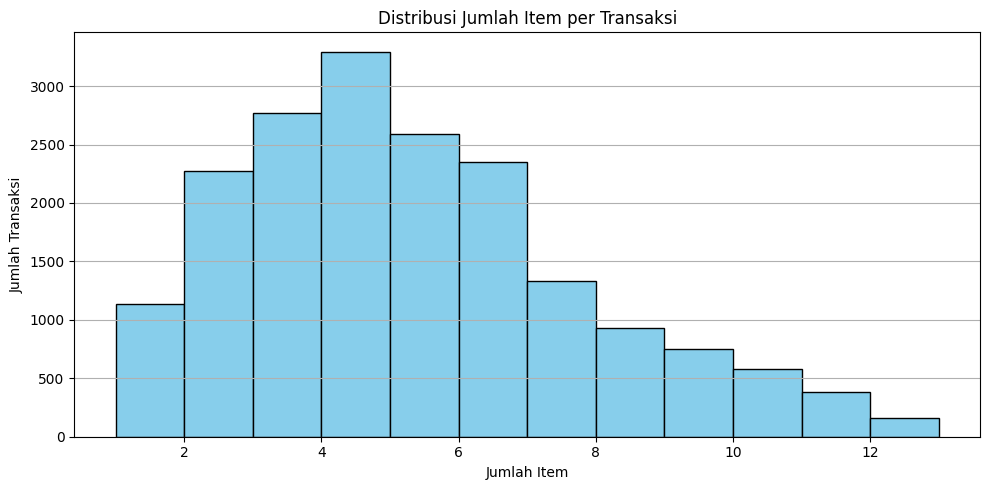

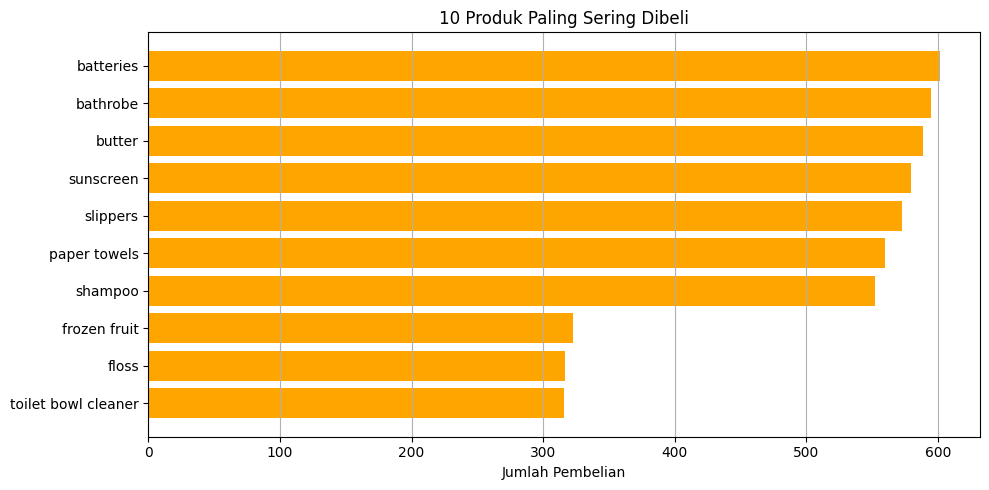

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# --- 1. Info dasar ---
total_transactions = df.shape[0]
all_items = [item for sublist in df['Product'] for item in sublist]
unique_items = set(all_items)

print(f"Total Transaksi: {total_transactions}")
print(f"Total Produk Unik: {len(unique_items)}")

# --- 2. Produk paling sering dibeli ---
item_counts = Counter(all_items)
top_items = item_counts.most_common(10)

print("\nTop 10 Produk Terlaris:")
for item, count in top_items:
    print(f"{item}: {count} kali")

# --- 3. Distribusi jumlah item per transaksi ---
df['Jumlah_Item'] = df['Product'].apply(len)

plt.figure(figsize=(10,5))
plt.hist(df['Jumlah_Item'], bins=range(1, max(df['Jumlah_Item'])+2), color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Item per Transaksi')
plt.xlabel('Jumlah Item')
plt.ylabel('Jumlah Transaksi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 4. Bar chart produk terlaris ---
top_item_names = [item[0] for item in top_items]
top_item_counts = [item[1] for item in top_items]

plt.figure(figsize=(10,5))
plt.barh(top_item_names[::-1], top_item_counts[::-1], color='orange')
plt.title('10 Produk Paling Sering Dibeli')
plt.xlabel('Jumlah Pembelian')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


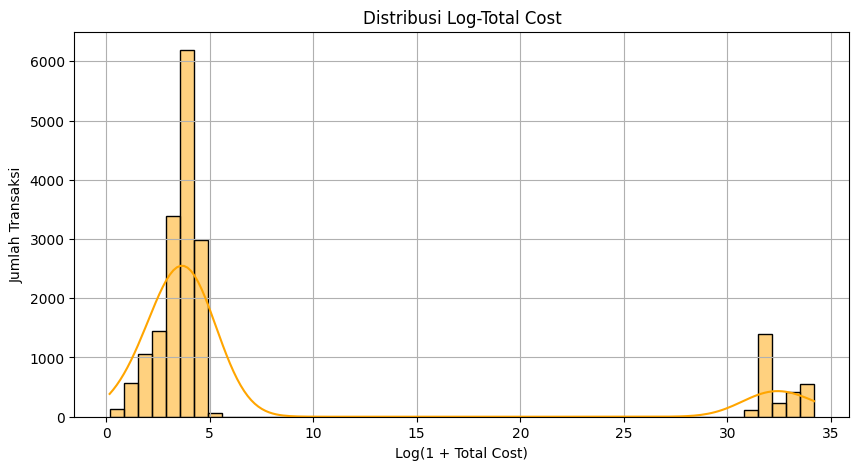

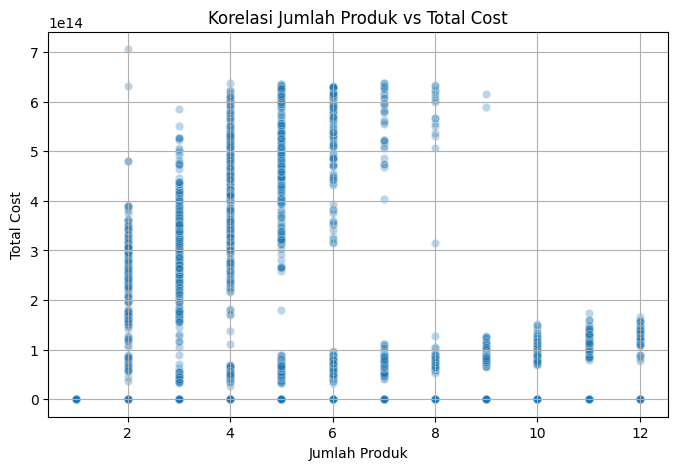

Korelasi antara jumlah produk dan total cost: 0.015


In [28]:
import numpy as np

df['Log_Total_Cost'] = df['Total_Cost'].apply(lambda x: np.log1p(x))  # log(1 + x) biar aman dari nol
plt.figure(figsize=(10, 5))
sns.histplot(df['Log_Total_Cost'], bins=50, kde=True, color='orange')
plt.title('Distribusi Log-Total Cost')
plt.xlabel('Log(1 + Total Cost)')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

# Hitung jumlah produk per transaksi
df['Item_Count'] = df['Product'].apply(len)

# Scatter plot jumlah produk vs total cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Count', y='Total_Cost', data=df, alpha=0.3)
plt.title('Korelasi Jumlah Produk vs Total Cost')
plt.xlabel('Jumlah Produk')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

# Korelasi Pearson-nya
corr = df[['Item_Count', 'Total_Cost']].corr().iloc[0, 1]
print(f"Korelasi antara jumlah produk dan total cost: {corr:.3f}")



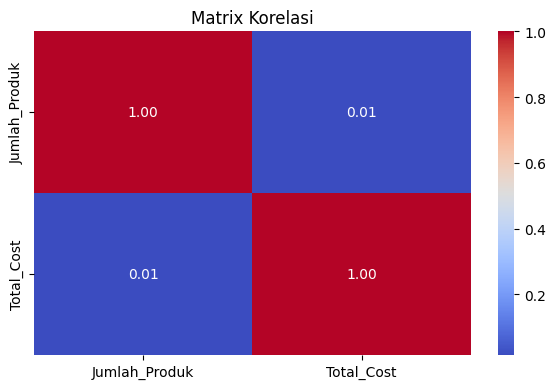

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misal kolom yang kamu punya: Total_Cost dan Jumlah Produk
df['Jumlah_Produk'] = df['Product'].apply(len)

# Buat matrix korelasi
corr_matrix = df[['Jumlah_Produk', 'Total_Cost']].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrix Korelasi")
plt.tight_layout()
plt.show()


In [30]:
from mlxtend.preprocessing import TransactionEncoder

# Ambil list produk per transaksi
transactions = df['Product'].tolist()

# Encode dengan TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded


,air freshener,allergy medicine,almonds,aluminum foil,apples,backpack,bagels,baking powder,baking soda,bananas,...,water,water bottle,weight bench,wine,winter hat,workout clothes,yoga mat,yoga pants,yogurt,ziploc bags
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
18527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18528,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
18529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
58,0.032162,(batteries)
136,0.031946,(bathrobe)
182,0.031677,(butter)
55,0.030705,(sunscreen)
0,0.030597,(slippers)
...,...,...
312,0.001025,"(batteries, post-it notes)"
317,0.001025,"(paper towels, bathrobe)"
314,0.001025,"(bathrobe, sunscreen)"
315,0.001025,"(sunscreen, butter)"


In [32]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length'] >= 2]


,support,itemsets,length
311,0.001187,"(batteries, slippers)",2
312,0.001025,"(batteries, post-it notes)",2
313,0.001727,"(batteries, sunscreen)",2
314,0.001025,"(bathrobe, sunscreen)",2
315,0.001025,"(sunscreen, butter)",2
316,0.001079,"(paper towels, sunscreen)",2
317,0.001025,"(paper towels, bathrobe)",2
318,0.001025,"(batteries, frozen burritos)",2
319,0.001565,"(batteries, bathrobe)",2
320,0.001079,"(sunscreen, shampoo)",2


In [33]:
from mlxtend.frequent_patterns import association_rules

# Asumsikan 'frequent_itemsets' sudah didapat dari apriori
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Tampilkan aturan dengan confidence tertinggi
rules.sort_values(by="confidence", ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(post-it notes),(batteries),0.015164,0.032162,0.001025,0.067616,2.102325,1.0,0.000538,1.038024,0.532410,0.022145,0.036631,0.049747
22,(heels),(slippers),0.016405,0.030597,0.001025,0.062500,2.042659,1.0,0.000523,1.034029,0.518955,0.022300,0.032910,0.048005
15,(frozen burritos),(batteries),0.016459,0.032162,0.001025,0.062295,1.936896,1.0,0.000496,1.032135,0.491805,0.021542,0.031134,0.047087
5,(sunscreen),(batteries),0.030705,0.032162,0.001727,0.056239,1.748599,1.0,0.000739,1.025511,0.441675,0.028244,0.024877,0.054965
4,(batteries),(sunscreen),0.032162,0.030705,0.001727,0.053691,1.748599,1.0,0.000739,1.024290,0.442340,0.028244,0.023714,0.054965
17,(bathrobe),(batteries),0.031946,0.032162,0.001565,0.048986,1.523102,1.0,0.000537,1.017691,0.354779,0.025022,0.017383,0.048822
16,(batteries),(bathrobe),0.032162,0.031946,0.001565,0.048658,1.523102,1.0,0.000537,1.017566,0.354858,0.025022,0.017263,0.048822
21,(butter),(bathrobe),0.031677,0.031946,0.001457,0.045997,1.439802,1.0,0.000445,1.014728,0.315453,0.023437,0.014514,0.045802
20,(bathrobe),(butter),0.031946,0.031677,0.001457,0.045608,1.439802,1.0,0.000445,1.014597,0.315541,0.023437,0.014387,0.045802
1,(slippers),(batteries),0.030597,0.032162,0.001187,0.038801,1.206402,1.0,0.000203,1.006906,0.176489,0.019281,0.006859,0.037857


In [34]:
# Ekstrak semua item unik dari kolom 'antecedents'
antecedent_items = set()

for items in rules['antecedents']:
    antecedent_items.update(items)

# Ubah ke list dan urutkan
antecedent_items = sorted(list(antecedent_items))

# Tampilkan (misalnya 20 pertama)
print(antecedent_items[:20])


['bathrobe', 'batteries', 'butter', 'frozen burritos', 'heels', 'paper towels', 'post-it notes', 'shampoo', 'slippers', 'sunscreen']


In [35]:
def rekomendasi_dari_input(user_input, rules_df):
    # Ubah input jadi lowercase biar robust
    user_input = user_input.lower()

    # Ambil daftar barang yang ada di antecedents
    all_antecedents = set()
    for itemset in rules_df['antecedents']:
        all_antecedents.update(itemset)

    if user_input not in all_antecedents:
        print(f"Maaf, '{user_input}' tidak ditemukan rekomendasi yang cocok dalam daftar barang yang bisa dianalisis ")
        print("Silakan pilih salah satu dari barang berikut:")
        print(sorted(all_antecedents))
        return None
    else:
        hasil = rules_df[rules_df['antecedents'].apply(lambda x: user_input in x)]
        if hasil.empty:
            print(f"Tidak ditemukan rekomendasi untuk '{user_input}'.")
        else:
            print(f"Rekomendasi untuk barang '{user_input}':\n")
            return hasil[['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by='confidence', ascending=False)

# Contoh pemakaian:
rekomendasi_dari_input('butter', rules)


Rekomendasi untuk barang 'butter':



,antecedents,consequents,confidence,lift
21,(butter),(bathrobe),0.045997,1.439802
9,(butter),(sunscreen),0.032368,1.054149
